<a href="https://colab.research.google.com/github/shree-bot/K_Means_Clustering/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import DataSet**


In [3]:
import pandas as pd
path="/content/drive/MyDrive/income.csv"
data=pd.read_csv(path)

data.describe

<bound method NDFrame.describe of         Name  Age  Income($)
0        Rob   27      70000
1    Michael   29      90000
2      Mohan   29      61000
3     Ismail   28      60000
4       Kory   42     150000
5     Gautam   39     155000
6      David   41     160000
7     Andrea   38     162000
8       Brad   36     156000
9   Angelina   35     130000
10    Donald   37     137000
11       Tom   26      45000
12    Arnold   27      48000
13     Jared   28      51000
14     Stark   29      49500
15    Ranbir   32      53000
16    Dipika   40      65000
17  Priyanka   41      63000
18      Nick   43      64000
19      Alia   39      80000
20       Sid   41      82000
21     Abdul   39      58000>

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as nd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


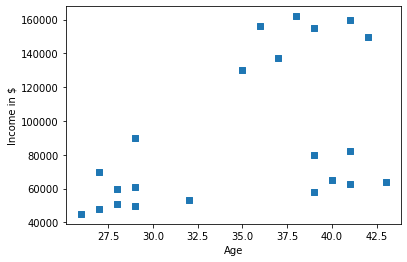

In [6]:
data.rename(columns={'Income($)':'income','Age':'age'}, inplace = True)

plt.scatter(data.age,data.income,marker=',')
plt.xlabel('Age')
plt.ylabel('Income in $')
plt.show()

In [7]:
data.describe()

,age,income
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [8]:
scaler = MinMaxScaler()

scaler.fit(data[['income']])
data.income = scaler.transform(data[['income']])

scaler.fit(data[['age']])
data.age = scaler.transform(data[['age']])

In [9]:
data.head()

,Name,age,income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


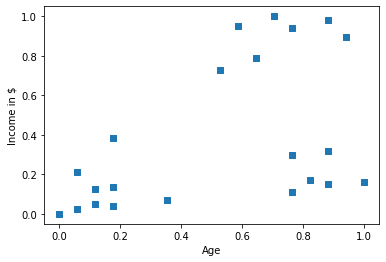

In [10]:
plt.scatter(data.age,data.income,marker=',')
plt.xlabel("Age")
plt.ylabel("Income in $")
plt.show()

In [11]:
inertias=[]
range_k = range(1,15)
for k in range_k:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data[['age','income']])
  inertias.append(kmeans.inertia_)

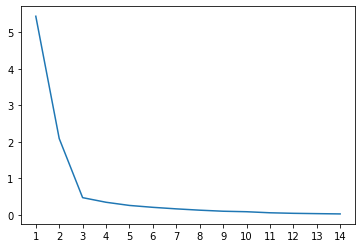

In [12]:
plt.plot(range_k,inertias)
plt.xticks(range_k)
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3)
pred_Y = kmeans.fit_predict(data[['age','income']])
data['clusternum']=pred_Y
data.head()

,Name,age,income,clusternum
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [14]:
centroid = kmeans.cluster_centers_

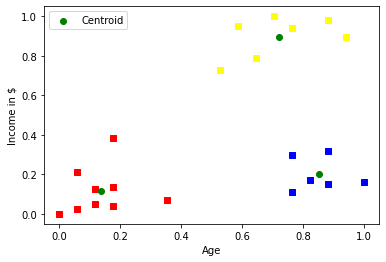

In [15]:
data_1 = data[data.clusternum==0]
data_2 = data[data.clusternum==1]
data_3 = data[data.clusternum==2]
plt.scatter(data_1.age,data_1.income, marker=',',color='yellow')
plt.scatter(data_2.age,data_2.income,marker=',',color='blue')
plt.scatter(data_3.age,data_3.income,marker=',',color='red')

plt.scatter(centroid[:,0],centroid[:,1],color='green',label='Centroid')

plt.xlabel("Age")
plt.ylabel("Income in $")
plt.legend()
plt.show()